In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import Imputer
from matplotlib import pyplot as plt1
from matplotlib import pyplot as plt2
from sklearn import preprocessing


print ("Start")


df1 = pd.read_csv('12_lakh_train.csv', encoding = 'latin-1')
df2 = pd.read_csv('testless.csv', encoding = 'latin-1')






Start


In [2]:

y = df1['click']
y.column = ['click']
X = df1.drop(['click','id', 'hour', 'C20', 'C15', 'C16', 'C18', 'C19', 'C21', 'C17', 'C14', 'C1', 'device_conn_type'], 1)
XT = df2.drop(['id', 'hour', 'C20', 'C15', 'C16', 'C18', 'C19', 'C21', 'C17', 'C14', 'C1', 'device_conn_type'], 1)

#print (y.head())
#df1.columns = ['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
col = ['banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_type']

le = preprocessing.LabelEncoder()
banner_pos_cat = le.fit_transform(X.banner_pos)
site_id_cat = le.fit_transform(X.site_id)
site_category_cat = le.fit_transform(X.site_category)
site_domain_cat = le.fit_transform(X.site_domain)
app_id_cat = le.fit_transform(X.app_id)
app_domain_cat = le.fit_transform(X.app_domain)
app_category_cat = le.fit_transform(X.app_category)
device_id_cat = le.fit_transform(X.device_id)
device_ip_cat = le.fit_transform(X.device_ip)
device_model_cat = le.fit_transform(X.device_model)
device_type_cat = le.fit_transform(X.device_type)


X['banner_pos_cat'] = banner_pos_cat
X['site_id_cat'] = site_id_cat
X['site_category_cat'] = site_category_cat
X['site_domain_cat'] = site_domain_cat
X['app_id_cat'] = app_id_cat
X['app_domain_cat'] = app_domain_cat
X['app_category_cat'] = app_category_cat
X['device_id_cat'] = device_id_cat
X['device_ip_cat'] =device_ip_cat
X['device_model_cat'] =device_model_cat
X['device_type_cat'] = device_type_cat



banner_pos_cat = le.fit_transform(XT.banner_pos)
site_id_cat = le.fit_transform(XT.site_id)
site_category_cat = le.fit_transform(XT.site_category)
site_domain_cat = le.fit_transform(XT.site_domain)
app_id_cat = le.fit_transform(XT.app_id)
app_domain_cat = le.fit_transform(XT.app_domain)
app_category_cat = le.fit_transform(XT.app_category)
device_id_cat = le.fit_transform(XT.device_id)
device_ip_cat = le.fit_transform(XT.device_ip)
device_model_cat = le.fit_transform(XT.device_model)
device_type_cat = le.fit_transform(XT.device_type)


# initialize the encoded categorical columns


XT['banner_pos_cat'] = banner_pos_cat
XT['site_id_cat'] = site_id_cat
XT['site_category_cat'] = site_category_cat
XT['site_domain_cat'] = site_domain_cat
XT['app_id_cat'] = app_id_cat
XT['app_domain_cat'] = app_domain_cat
XT['app_category_cat'] = app_category_cat
XT['device_id_cat'] = device_id_cat
XT['device_ip_cat'] =device_ip_cat
XT['device_model_cat'] =device_model_cat
XT['device_type_cat'] = device_type_cat


X = X.drop(col, axis = 1)
XT = XT.drop(col, axis = 1)

X_train = X
X_test = XT

y_train = y

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

# vectorizer = CountVectorizer()
# counts = vectorizer.fit_transform(X_train)
#
# counts_y = vectorizer.fit_transform(y_train)
# print (type(counts))
classifier = MultinomialNB()


             id      hour    C1  banner_pos   site_id site_domain  \
0  1.000017e+19  14103100  1005           0  235ba823    f6ebf28e   
1  1.000018e+19  14103100  1005           0  1fbe01fe    f3845767   
2  1.000055e+19  14103100  1005           0  1fbe01fe    f3845767   
3  1.000109e+19  14103100  1005           0  85f751fd    c4e18dd6   
4  1.000138e+19  14103100  1005           0  85f751fd    c4e18dd6   

  site_category    app_id app_domain app_category ...  device_type  \
0      f028772b  ecad2386   7801e8d9     07d7df22 ...            1   
1      28905ebd  ecad2386   7801e8d9     07d7df22 ...            1   
2      28905ebd  ecad2386   7801e8d9     07d7df22 ...            1   
3      50e219e0  51cedd4e   aefc06bd     0f2161f8 ...            1   
4      50e219e0  9c13b419   2347f47a     f95efa07 ...            1   

  device_conn_type    C14  C15  C16   C17  C18  C19     C20  C21  
0                0   8330  320   50   761    3  175  100075   23  
1                0  22676  320

[]

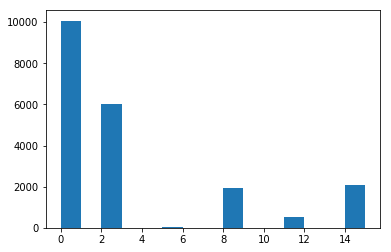

In [3]:
classifier.fit(X_train,y_train)
#
# counts_test = vectorizer.transform(X_test)



prediction = classifier.predict(X_test)
print (df2.head())
print (prediction)
print (type(prediction))

XT['click'] = prediction
print (XT.head())

ones = []

zeros = []



df3 = pd.DataFrame()
df2['click'] = prediction
print(df2.shape)
df2.to_csv('Holla.csv', sep=',', encoding='utf-8')


attr = 6
for i,row in enumerate(XT.values):
    if(row[11] == 1):
        ones.append(row[attr])
    else:
        zeros.append(row[attr])        

data = zeros
plt1.hist(data, bins=np.arange(min(data), max(data)+1))
print("For app_id as 0")
plt1.plot()



#print('Accuracy score: {}'.format(accuracy_score(y_test, prediction)))
#print('Precision score: {}'.format(precision_score(y_test, prediction)))
#print('Recall score: {}'.format(recall_score(y_test, prediction)))
#print('F1 score: {}'.format(f1_score(y_test, prediction,average=None)))